In [131]:
import os
os.getcwd()

'/Users/bernardbarnieh/Documents/msr2026-aidev/notebooks'

In [132]:
import pandas as pd

path = "/Users/bernardbarnieh/Documents/msr2026-aidev/data/processed/agentic_failure_modes_coding_sheet.csv"

df = pd.read_csv(path, sep=";", encoding="cp1252")   # most common for Excel on Windows/EU
df.head()

,id,number,repo_full_name,state,merged,closed_without_merge,ci_runs,ci_any_failure,ci_any_success,pr_url,...,T3_syntax_compile,T4_missing_tests,T5_style_conventions,T6_build_ci_config,P1_low_priority,P2_duplicate_alt_solution,P3_abandoned_no_response,P4_unknown,primary_failure_mode,notes
0,2758595312,299,different-ai/note-companion,closed,True,False,1,True,False,https://github.com/different-ai/note-companion...,...,0,0,0,0,0,0,0,0,none,Merged successfully. All visible CI checks gre...
1,3238853538,7323,microsoft/vscode-pull-request-github,closed,False,True,0,False,False,https://github.com/microsoft/vscode-pull-reque...,...,0,0,0,0,1,0,0,0,P1_low_priority,"All CI checks (build, TypeScript, lint, GraphQ..."
2,2964834156,56960,airbytehq/airbyte,closed,False,True,2,True,False,https://github.com/airbytehq/airbyte/pull/56960,...,0,0,0,1,0,0,0,1,T6_build_ci_config,Huge auto-generated docs changelog PR. Docs/Ve...
3,3227896964,15250,mautic/mautic,closed,False,True,0,False,False,https://github.com/mautic/mautic/pull/15250,...,0,0,0,1,0,1,0,0,P2_duplicate_alt_solution,SonarCloud quality gate failed on maintainabil...
4,3244652867,233,StephenDev0/StikDebug,closed,False,True,1,False,True,https://github.com/StephenDev0/StikDebug/pull/233,...,0,0,0,0,0,0,0,1,P4_unknown,CI job ÒBuild Unsigned IPAÓ passes; author not...


In [133]:
df.shape


(100, 22)

In [134]:
df.columns


Index(['id', 'number', 'repo_full_name', 'state', 'merged',
       'closed_without_merge', 'ci_runs', 'ci_any_failure', 'ci_any_success',
       'pr_url', 'T1_ci_test_failure', 'T2_logic_bug', 'T3_syntax_compile',
       'T4_missing_tests', 'T5_style_conventions', 'T6_build_ci_config',
       'P1_low_priority', 'P2_duplicate_alt_solution',
       'P3_abandoned_no_response', 'P4_unknown', 'primary_failure_mode',
       'notes'],
      dtype='object')

In [135]:
df.isna().sum()

id                           0
number                       0
repo_full_name               0
state                        0
merged                       0
closed_without_merge         0
ci_runs                      0
ci_any_failure               0
ci_any_success               0
pr_url                       0
T1_ci_test_failure           0
T2_logic_bug                 0
T3_syntax_compile            0
T4_missing_tests             0
T5_style_conventions         0
T6_build_ci_config           0
P1_low_priority              0
P2_duplicate_alt_solution    0
P3_abandoned_no_response     0
P4_unknown                   0
primary_failure_mode         0
notes                        0
dtype: int64

In [136]:
technical_cols = [
    "T1_ci_test_failure",
    "T2_logic_bug",
    "T3_syntax_compile",
    "T4_missing_tests",
    "T5_style_conventions",
    "T6_build_ci_config"
]

process_cols = [
    "P1_low_priority",
    "P2_duplicate_alt_solution",
    "P3_abandoned_no_response",
    "P4_unknown"
]

In [137]:
N = len(df)

freq_table = []

for col in technical_cols + process_cols:
    count = df[col].sum()
    freq_table.append({
        "failure_mode": col,
        "count": int(count),
        "percentage": round(100 * count / N, 1)
    })

freq_df = pd.DataFrame(freq_table).sort_values("percentage", ascending=False)
freq_df

,failure_mode,count,percentage
9,P4_unknown,33,33.0
8,P3_abandoned_no_response,21,21.0
0,T1_ci_test_failure,20,20.0
6,P1_low_priority,14,14.0
4,T5_style_conventions,10,10.0
5,T6_build_ci_config,9,9.0
7,P2_duplicate_alt_solution,8,8.0
1,T2_logic_bug,5,5.0
2,T3_syntax_compile,3,3.0
3,T4_missing_tests,1,1.0


In [138]:
tech_total = df[technical_cols].any(axis=1).sum()
proc_total = df[process_cols].any(axis=1).sum()

tech_total, proc_total

(39, 76)

In [139]:
print(f"Technical failure present in {tech_total/N:.1%} of PRs")
print(f"Process failure present in {proc_total/N:.1%} of PRs")

Technical failure present in 39.0% of PRs
Process failure present in 76.0% of PRs


In [140]:
pd.crosstab(
    df["T1_ci_test_failure"],
    df["T4_missing_tests"],
    normalize="index"
)

T4_missing_tests,0,1
T1_ci_test_failure,,
0,1.00,0.00
1,0.95,0.05


In [141]:
df["primary_failure_mode"].value_counts(normalize=True) * 100

primary_failure_mode
P4_unknown                   31.0
P3_abandoned_no_response     14.0
P1_low_priority              11.0
T1_ci_test_failure           11.0
P2_duplicate_alt_solution     8.0
none                          6.0
T6_build_ci_config            5.0
T5_style_convention           5.0
T2_logic_bug                  3.0
T3_syntax_compile             3.0
 T6_build_ci_config           1.0
T4_missing_tests              1.0
build_ci_config               1.0
Name: proportion, dtype: float64

In [142]:
df.columns.tolist()

['id',
 'number',
 'repo_full_name',
 'state',
 'merged',
 'closed_without_merge',
 'ci_runs',
 'ci_any_failure',
 'ci_any_success',
 'pr_url',
 'T1_ci_test_failure',
 'T2_logic_bug',
 'T3_syntax_compile',
 'T4_missing_tests',
 'T5_style_conventions',
 'T6_build_ci_config',
 'P1_low_priority',
 'P2_duplicate_alt_solution',
 'P3_abandoned_no_response',
 'P4_unknown',
 'primary_failure_mode',
 'notes']

In [143]:
df[df["primary_failure_mode"] == "T1_ci_test_failure"][["repo_full_name","number","pr_url","notes"]].head(3)

,repo_full_name,number,pr_url,notes
49,sequinstream/sequin,1884,https://github.com/sequinstream/sequin/pull/1884,GitHub Actions / signoff job failed due to tes...
52,antiwork/shortest,250,https://github.com/antiwork/shortest/pull/250,Docs-only README change. One CI job ÒShortest ...
69,tphakala/birdnet-go,834,https://github.com/tphakala/birdnet-go/pull/834,Merged PR. Adds async notification & telemetry...


In [144]:
mode_counts = df["primary_failure_mode"].value_counts(dropna=False)
mode_pct = df["primary_failure_mode"].value_counts(normalize=True, dropna=False) * 100

summary_primary = (
    mode_counts.rename("count")
    .to_frame()
    .join(mode_pct.rename("percent"))
)
summary_primary

,count,percent
primary_failure_mode,,
P4_unknown,31,31.0
P3_abandoned_no_response,14,14.0
P1_low_priority,11,11.0
T1_ci_test_failure,11,11.0
P2_duplicate_alt_solution,8,8.0
none,6,6.0
T6_build_ci_config,5,5.0
T5_style_convention,5,5.0
T2_logic_bug,3,3.0


In [145]:
code_cols = [
    "T1_ci_test_failure","T2_logic_bug","T3_syntax_compile","T4_missing_tests",
    "T5_style_conventions","T6_build_ci_config",
    "P1_low_priority","P2_duplicate_alt_solution","P3_abandoned_no_response","P4_unknown"
]

flag_counts = df[code_cols].sum().sort_values(ascending=False)
flag_pct = (df[code_cols].mean() * 100).sort_values(ascending=False)

summary_flags = (
    flag_counts.rename("count")
    .to_frame()
    .join(flag_pct.rename("percent"))
)
summary_flags

,count,percent
P4_unknown,33,33.0
P3_abandoned_no_response,21,21.0
T1_ci_test_failure,20,20.0
P1_low_priority,14,14.0
T5_style_conventions,10,10.0
T6_build_ci_config,9,9.0
P2_duplicate_alt_solution,8,8.0
T2_logic_bug,5,5.0
T3_syntax_compile,3,3.0
T4_missing_tests,1,1.0


In [146]:
co = df[code_cols].T.dot(df[code_cols])
co

,T1_ci_test_failure,T2_logic_bug,T3_syntax_compile,T4_missing_tests,T5_style_conventions,T6_build_ci_config,P1_low_priority,P2_duplicate_alt_solution,P3_abandoned_no_response,P4_unknown
T1_ci_test_failure,20,2,1,1,3,1,1,1,5,4
T2_logic_bug,2,5,0,0,0,0,1,0,1,1
T3_syntax_compile,1,0,3,0,1,0,1,0,2,0
T4_missing_tests,1,0,0,1,0,0,0,0,1,0
T5_style_conventions,3,0,1,0,10,2,0,0,3,0
T6_build_ci_config,1,0,0,0,2,9,1,1,1,2
P1_low_priority,1,1,1,0,0,1,14,0,0,0
P2_duplicate_alt_solution,1,0,0,0,0,1,0,8,0,0
P3_abandoned_no_response,5,1,2,1,3,1,0,0,21,0
P4_unknown,4,1,0,0,0,2,0,0,0,33


In [147]:
import numpy as np

co_pairs = (
    co.where(np.triu(np.ones(co.shape), k=1).astype(bool))
      .stack()
      .sort_values(ascending=False)
)
co_pairs.head(15)

T1_ci_test_failure    P3_abandoned_no_response     5.0
                      P4_unknown                   4.0
                      T5_style_conventions         3.0
T5_style_conventions  P3_abandoned_no_response     3.0
T1_ci_test_failure    T2_logic_bug                 2.0
T6_build_ci_config    P4_unknown                   2.0
T5_style_conventions  T6_build_ci_config           2.0
T3_syntax_compile     P3_abandoned_no_response     2.0
T1_ci_test_failure    P2_duplicate_alt_solution    1.0
T3_syntax_compile     T5_style_conventions         1.0
T4_missing_tests      P3_abandoned_no_response     1.0
T1_ci_test_failure    T6_build_ci_config           1.0
T6_build_ci_config    P1_low_priority              1.0
                      P2_duplicate_alt_solution    1.0
T1_ci_test_failure    T3_syntax_compile            1.0
dtype: float64

In [148]:
top_modes = df["primary_failure_mode"].value_counts().head(5).index

examples = (
    df[df["primary_failure_mode"].isin(top_modes)]
    .sort_values("primary_failure_mode")
    .groupby("primary_failure_mode")
    .head(2)[["primary_failure_mode","repo_full_name","number","pr_url","notes"]]
)
examples

,primary_failure_mode,repo_full_name,number,pr_url,notes
1,P1_low_priority,microsoft/vscode-pull-request-github,7323,https://github.com/microsoft/vscode-pull-reque...,"All CI checks (build, TypeScript, lint, GraphQ..."
59,P1_low_priority,alvinwan/timefhuman,79,https://github.com/alvinwan/timefhuman/pull/79,Closed by author without merge; no CI checks o...
42,P2_duplicate_alt_solution,JuliaLang/julia,59071,https://github.com/JuliaLang/julia/pull/59071,Closed as duplicate; changes were merged via t...
70,P2_duplicate_alt_solution,dotnet/maui,30286,https://github.com/dotnet/maui/pull/30286,Superseded by newer PR #30651; maintainer clos...
94,P3_abandoned_no_response,phellipeandrade/rbac,40,https://github.com/phellipeandrade/rbac/pull/40,Closed unmerged by author with no maintainer r...
50,P3_abandoned_no_response,surrealdb/surrealdb,6146,https://github.com/surrealdb/surrealdb/pull/6146,Closed by author without merge; CI checks all ...
86,P4_unknown,web-infra-dev/rspack,10677,https://github.com/web-infra-dev/rspack/pull/1...,Large refactor replacing std HashMap/HashSet w...
88,P4_unknown,PriorLabs/TabPFN,349,https://github.com/PriorLabs/TabPFN/pull/349,Adds example + tests + README docs for saving/...
82,T1_ci_test_failure,mastra-ai/mastra,4793,https://github.com/mastra-ai/mastra/pull/4793,"GitHub Actions ""test (vectorize)"" failed in sr..."
81,T1_ci_test_failure,janbjorge/pgqueuer,397,https://github.com/janbjorge/pgqueuer/pull/397,Merged. Very small typo/comment fix. Early CI ...


In [149]:
code_cols = [
    "T1_ci_test_failure","T2_logic_bug","T3_syntax_compile","T4_missing_tests",
    "T5_style_conventions","T6_build_ci_config",
    "P1_low_priority","P2_duplicate_alt_solution","P3_abandoned_no_response","P4_unknown"
]

summary_flags = (
    pd.DataFrame({
        "count": df[code_cols].sum(),
        "percent": (df[code_cols].mean()*100).round(1)
    })
    .sort_values("percent", ascending=False)
)
summary_flags

,count,percent
P4_unknown,33,33.0
P3_abandoned_no_response,21,21.0
T1_ci_test_failure,20,20.0
P1_low_priority,14,14.0
T5_style_conventions,10,10.0
T6_build_ci_config,9,9.0
P2_duplicate_alt_solution,8,8.0
T2_logic_bug,5,5.0
T3_syntax_compile,3,3.0
T4_missing_tests,1,1.0


In [150]:
summary_primary = (
    df["primary_failure_mode"]
    .value_counts(dropna=False)
    .to_frame("count")
    .assign(percent=lambda x: (x["count"]/len(df)*100).round(1))
)
summary_primary

,count,percent
primary_failure_mode,,
P4_unknown,31,31.0
P3_abandoned_no_response,14,14.0
P1_low_priority,11,11.0
T1_ci_test_failure,11,11.0
P2_duplicate_alt_solution,8,8.0
none,6,6.0
T6_build_ci_config,5,5.0
T5_style_convention,5,5.0
T2_logic_bug,3,3.0


In [151]:
import numpy as np

co = df[code_cols].T.dot(df[code_cols])          # co-occurrence counts
upper = co.where(np.triu(np.ones(co.shape), k=1).astype(bool))
top_pairs = (
    upper.stack()
    .sort_values(ascending=False)
    .head(10)
    .to_frame("co_occurrence_count")
)
top_pairs

co_occurrence_count
T1_ci_test_failure   P3_abandoned_no_response                   5.0
                     P4_unknown                                 4.0
                     T5_style_conventions                       3.0
T5_style_conventions P3_abandoned_no_response                   3.0
T1_ci_test_failure   T2_logic_bug                               2.0
T6_build_ci_config   P4_unknown                                 2.0
T5_style_conventions T6_build_ci_config                         2.0
T3_syntax_compile    P3_abandoned_no_response                   2.0
T1_ci_test_failure   P2_duplicate_alt_solution                  1.0
T3_syntax_compile    T5_style_conventions                       1.0

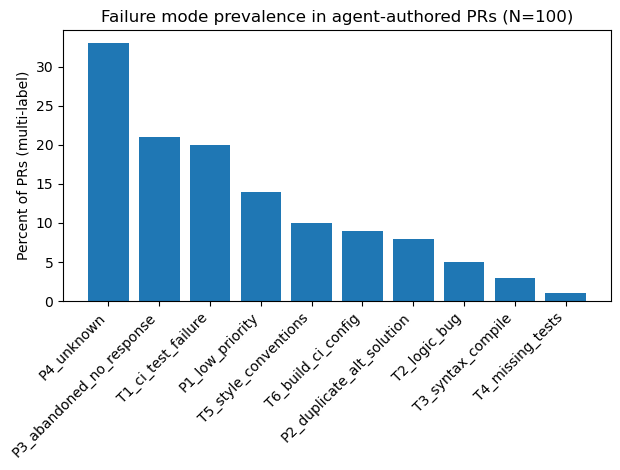

In [152]:
import matplotlib.pyplot as plt

plot_df = summary_flags.reset_index().rename(columns={"index":"failure_mode"})
plt.figure()
plt.bar(plot_df["failure_mode"], plot_df["percent"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent of PRs (multi-label)")
plt.title("Failure mode prevalence in agent-authored PRs (N=100)")
plt.tight_layout()
plt.show()

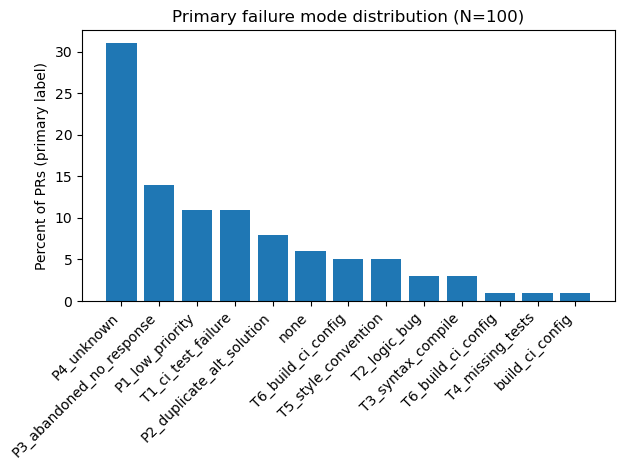

In [153]:
primary_df = (
    df["primary_failure_mode"]
    .value_counts(dropna=False)
    .to_frame("count")
    .assign(percent=lambda x: (x["count"]/len(df)*100).round(1))
    .reset_index()
    .rename(columns={"index":"primary_failure_mode"})
)

plt.figure()
plt.bar(primary_df["primary_failure_mode"], primary_df["percent"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent of PRs (primary label)")
plt.title("Primary failure mode distribution (N=100)")
plt.tight_layout()
plt.show()

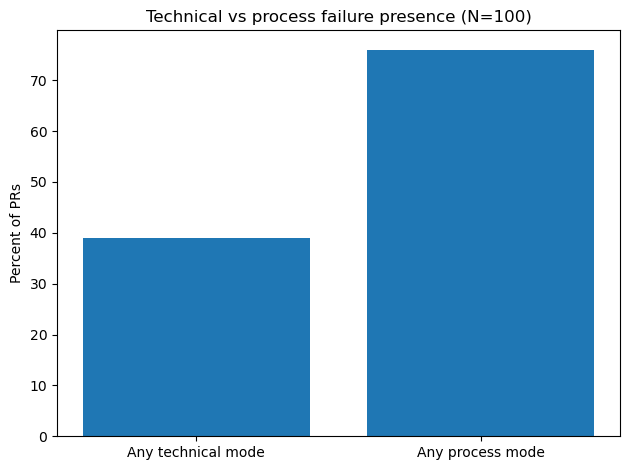

In [154]:
technical_cols = ["T1_ci_test_failure","T2_logic_bug","T3_syntax_compile","T4_missing_tests","T5_style_conventions","T6_build_ci_config"]
process_cols   = ["P1_low_priority","P2_duplicate_alt_solution","P3_abandoned_no_response","P4_unknown"]

tech_present = df[technical_cols].any(axis=1).mean()*100
proc_present = df[process_cols].any(axis=1).mean()*100

plt.figure()
plt.bar(["Any technical mode", "Any process mode"], [tech_present, proc_present])
plt.ylabel("Percent of PRs")
plt.title("Technical vs process failure presence (N=100)")
plt.tight_layout()
plt.show()